# Salary Prediction

The purpose of this project was to get familiar with Simple Linear Regression (LSR) and see how it is used in practice. Simple Linear Regression only has 2 variables:
- X : independent feature
- Y: dependent feature

Simple Linear Regression (SLR) is a regression model that estimates the relationship between one independent feature and one dependent feature using a straigt line. 
- Best to apply Linear Regressin after variable standardization
- Uses Gradient Descent Algortihm to find the best fit line

**Y =wX +B**

- Y = Dependent feature
- X = Independent feature
- w = weight
- b = Bias


**Gradient Descent**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w= w-a*dw
b = b-a*db


### Read in the dataset

In [45]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [46]:
# read in teh dataframe
dataset = pd.read_csv("Salary_Data.csv")

The dataset set concist of 2 features:\
    - YearsExperience = independent feature\
    - Salary = dependent feature

In [47]:
# Print first 5 rows of the dataset
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Expolartory Data Analysis (EDA)

Since the dataset only has 2 features complext EDA is not needed

In [48]:
# Check for null values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Visualize the dataset**

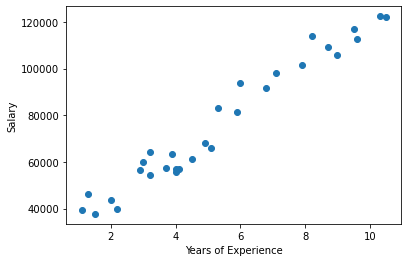

In [49]:
#scatter plot
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

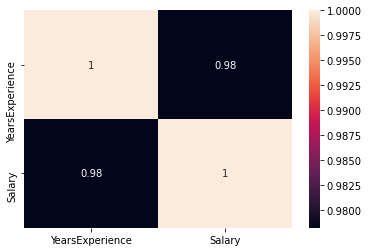

In [71]:
sns.heatmap(dataset.corr(), annot=True)

We can see that Years of Experience has a linear positive correlation with Salary. We can assume with a great certainty that as the Years of Experience increases the Salary increases

In [50]:
dataset.corr().T

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


YearsExperience and Salary are heavily correlated to eachother

In [51]:
# Get statistical info of the data
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Split data into x and y.

The train-test-split procedure is used to estimate the performance of machine learning algorithms when they are used to make prediction on data not used to train the model. The mode is split into
X_train = independet feature of the dataset
y_train dependent feature of the dataset

X_train and y_train are used together to predict the best fit line

X_test and y_test are used together to evaluate the best fit line with metric

In [52]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Lets split the dataset into variables:\
    x - containing the independent feature\
    y - containing the dependent feature

In [53]:
# for X the independent feature only YearsExperince is needed
X = dataset.iloc[:,:-1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [54]:
# for y the dependent feature only YearsExperince is needed
y = dataset.iloc[:,-1].values

In [55]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [56]:
# Import library to split the dataset
from sklearn.model_selection import train_test_split

**test_size** can be set to any value you want. It means that your data will be seperated into:\
2/3 X_train and y_train and 1/3 into X_test and y_test

**random_state** can be set into:
- Split your dataset into random X_train, y_train, X_test, y_test everytime you execute the code
- Split your dataset into the same order X_train, y_train, X_test, y_test everytime you execute the code. This makes the coding reproducible

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [58]:
print("X_train:", X_train.size)
print("X_test:", X_test.size)
print("y_train:", y_train.size)
print("y_test:", y_test.size)

print("")

print("we can see that the dataset is split into X_train y_train (30*2/3 = 20) and X_test, y_test (30*1/3=10)")

X_train: 20
X_test: 10
y_train: 20
y_test: 10

we can see that the dataset is split into X_train y_train (30*2/3 = 20) and X_test, y_test (30*1/3=10)


# Linear Regression model

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

We will load the Linear Regression model from libary called sklearn

In [59]:
from sklearn.linear_model import LinearRegression

#Define the class (the name that will be used to call the LinearRegression function from sklearn)
LR = LinearRegression()

In [60]:
#This line calculates the best fit line for your model
LR.fit(X_train,y_train)

LinearRegression()

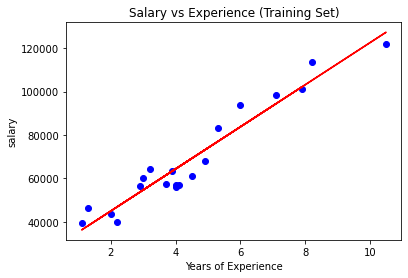

In [61]:
# visualise training dataset with the best fit line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,LR.predict(X_train),color="red")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.show()

As soon as the best fit line is created we can make predictions (remember that we use **X_test** to evalute our model)



In [62]:
# We will give the predicted values variable name y_pred_LR
y_pred_LR = LR.predict(X_test)

print(X_test)
print("")
print(y_pred_LR)

[[ 6.8]
 [ 8.7]
 [ 3.2]
 [ 5.9]
 [ 1.5]
 [ 9.6]
 [ 9.5]
 [ 5.1]
 [ 9. ]
 [10.3]]

[ 91477.92796603 109893.22802466  56585.7804865   82754.89109615
  40108.93306562 118616.26489454 117647.03857567  75001.08054514
 112800.90698129 125400.84912667]


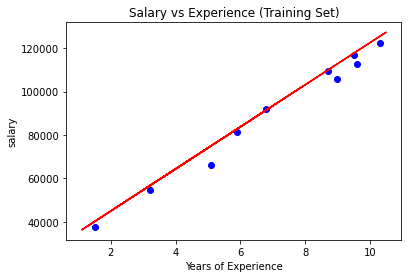

In [63]:
# visualise test dataset with the best fit line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train,LR.predict(X_train),color="red")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.show()

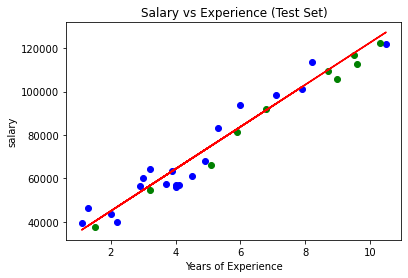

In [64]:
# visualise train data and test data with the best fit line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,LR.predict(X_train),color="red")
plt.scatter(X_test, y_test, color='green')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.show()

Lets evaluate how well our Simple Linear Regression model is performing

In [65]:
# Calculates the difference between the actual Salary and the predicted salary for our test (x_test, Y_test) dataset and store those values in variable called diff_LR
diff_LR=y_test-y_pred_LR

print("Acual values:")
print(y_test)
print("")
print("Predicted values:")
print(y_pred_LR)
print("")
print("Diff between actual and predicted values:")
print(diff_LR)

Acual values:
[ 91738. 109431.  54445.  81363.  37731. 112635. 116969.  66029. 105582.
 122391.]

Predicted values:
[ 91477.92796603 109893.22802466  56585.7804865   82754.89109615
  40108.93306562 118616.26489454 117647.03857567  75001.08054514
 112800.90698129 125400.84912667]

Diff between actual and predicted values:
[  260.07203397  -462.22802466 -2140.7804865  -1391.89109615
 -2377.93306562 -5981.26489454  -678.03857567 -8972.08054514
 -7218.90698129 -3009.84912667]


In [66]:
#Convert the values into a dataframe called res_df
res_df=pd.concat([pd.Series(y_test),pd.Series(y_pred_LR),pd.Series(diff_LR)],axis=1)
res_df.columns=['Actual Values','Predicted values',"Diff"]

In [67]:
res_df

,Actual Values,Predicted values,Diff
0,91738.0,91477.927966,260.072034
1,109431.0,109893.228025,-462.228025
2,54445.0,56585.780487,-2140.780487
3,81363.0,82754.891096,-1391.891096
4,37731.0,40108.933066,-2377.933066
5,112635.0,118616.264895,-5981.264895
6,116969.0,117647.038576,-678.038576
7,66029.0,75001.080545,-8972.080545
8,105582.0,112800.906981,-7218.906981
9,122391.0,125400.849127,-3009.849127


We can see that the difference between the Prediced values and Actual values is not that great as the Predicted values are fairly close to the Actual values.

In [68]:

print("Train score:", LR.score(X_train, y_train))
print("Test score:", LR.score(X_test, y_test))


Train score: 0.9300257612268854
Test score: 0.974811112371526


From the scores above we can conclude that our dataset is trained well on the Linear Regression Model ass it has an **predictive value of 97%**

# Metrics 

We will calculate the:
- **Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
-  **r2 (coefficient of determination) regression score function**: is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.




In [69]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
R2 = metrics.r2_score(y_test, y_pred_LR)

#on a average the difference between prediction and acutal is off with 4363 
print("RSME:", rmse)
print("R2:", R2) # when yourr2 is more than 70% it is ready for deployment

RSME: 4363.043260343273
R2: 0.974811112371526


**We can see that the R2 value is high which means that for 97% our independent and dependent variables are correlated with eachtohter**

In [70]:
#custom input to predict values
print(LR.predict([[4]]))
print(LR.predict([[10]]))

[64339.59103751]
[122493.17017005]


If a person has 6 years of expoerience he will earn x money if a person has 20 years experience he will earn x money